# **This notebook is mainly for the Interest Age feature**

# 1. Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/DMC 2021/Annotated datasets 

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1dGBu1hYjjEvCZYeftgJHAL1CPvpintcV/DMC 2021/Annotated datasets


In [ ]:
import pandas as pd
import numpy as np
items_dataset = pd.read_csv('items_inc_lang.csv')

In [ ]:
print(len(items_dataset))
items_dataset.head()

78030


,Unnamed: 0,itemID,title,author,publisher,main topic,subtopics,language
0,0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],en
1,1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",de
2,2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",en
3,3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",de
4,4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",de


## Add a new column **"age_identifier"** based on subtopic start with "5A"

In [ ]:
import re

item_data = items_dataset.copy()

def remove_brackets(subtopic):
  subtopic_list = str(subtopic).replace('[','').replace(']','')
  return (subtopic_list.split(",")) 

#remove subtopic's brackets
item_data.subtopics = item_data.subtopics.apply(remove_brackets)

In [ ]:
#age_distribution
age_distr = {}

def age_distribution(subtopic):
  if subtopic in age_distr:
    age_distr[subtopic] += 1
  else:
    age_distr[subtopic] = 1
  
  return(0)

In [ ]:
#New version
def age_identifier(subtopic5A):
  third_position = subtopic5A[2]

  #Interest age: < 6 yrs old
  if (third_position == 'B' or third_position == 'C' or third_position == 'D' or third_position == 'F' or third_position == 'G'):
    return (int('0'))
  #Interest age: 7-12 yrs old
  elif (third_position == 'H' or third_position == 'J' or third_position == 'K' or third_position == 'L' or 
        third_position == 'M' or third_position == 'N'):
    return (int('1'))
  #Interest age: 13-17 yrs old
  elif (third_position == 'P' or third_position == 'Q' or third_position == 'R' or third_position == 'S' or 
        third_position == 'T' or third_position == 'U'):
    return (int('2'))
  #Interest age: adult
  elif (third_position == 'X'):
    return (int('3'))
  #Others
  else: #only 3 cases which has subtopic (5AZ: for people with learning/communication difficulties) run this statment
    return (int('20')) #to represent if a case is in others type, its distance between age is very large

In [ ]:
def Y_identifier(subtopicY):
  if str(subtopicY) == 'nan': return ('N') #'None'
  if not subtopicY.startswith('Y'): return (str('N'))
  if (len(subtopicY) < 2): return (int(20))
  second_position = subtopicY[1]

  #Add to type (interest age < 6 yrs old) #YB: Children's: picture books, activity books, early learning concept
  if (second_position == 'B'):
    return (int(0))
  #Those categories are for Children or Teenager
  elif (second_position == 'D' or second_position == 'F' or second_position == 'N' or second_position == 'R' or
        second_position == 'X' or second_position == 'Z'):
    return (int(1.5)) #give an average score for this type (between 1 and 2)
  #YP: educational material. this type does not related to age
  elif (second_position == 'P'):
    return (int(20)) #others
  else:
    print(subtopicY)
    return (str('N')) #it should be N????


In [ ]:
#def add_age_column(subtopic, itemID):
def add_age_column(subtopic):

  word = [text for text in subtopic if text.startswith('5A')]
  if (len(word) == 1 and len(word[0]) >= 3):
    result = [age_identifier(word[0])]
    add = age_distribution(str(word[0][:3]))
  elif (len(word) == 1 and len(word[0]) == 2): #two case's subtopic: 5A
    add = age_distribution('others')
    result = [int('20')]
  elif (len(word) > 1): #cases with many age identifier!
    result = [age_identifier(w) for w in word if len(w) >= 3]
    rr = [int(20) for w in word if len(w) == 2]
    for w in word:
      if len(w) >= 3: add = age_distribution(str(w[:3]))
      elif len(w) == 2: add = age_distribution('others')
      else: add = age_distribution('false')
    result = result + rr
  else: #cases without age identifier!
    #if (len(word) != 0): print('false')
    add = age_distribution('None')
    #result = str('None')
    #directly consider if contain Y in subtopic
    contain_Y = [text for text in subtopic if text.startswith('Y')]
    if (len(contain_Y) > 0):
      result = [Y_identifier(y) for y in contain_Y if (len(y) > 1)]
      #no_result = [print('not a good label!') for y in contain_Y if (len(y) < 1)] #this case did not happen
    else: 
      result = [str('N')]

  return result

age_distr = {}
item_wo_age = []
item_data['age_identifier'] = item_data.subtopics.apply(add_age_column)
#item_data['age_identifier'] = [add_age_column(subtopic, itemID) for itemID, subtopic in zip(item_data.itemID, item_data.age_identifier)]
print(item_data.head(15))
print(age_distr)

    Unnamed: 0  itemID  ... language age_identifier
0            0   21310  ...       en            [1]
1            1   73018  ...       de            [1]
2            2   19194  ...       en            [2]
3            3   40250  ...       de         [0, 0]
4            4   46107  ...       de   [0, 0, 0, 0]
5            5   34217  ...       af            [N]
6            6   31436  ...       de            [0]
7            7   14576  ...       de            [2]
8            8   17731  ...       de            [2]
9            9   58723  ...       de            [1]
10          10   73124  ...       de   [0, 0, 1, 1]
11          11   33976  ...       de            [N]
12          12    2408  ...       de            [1]
13          13   30277  ...       de            [1]
14          14   29508  ...       de            [1]

[15 rows x 9 columns]
{'5AH': 930, '5AJ': 1224, '5AP': 473, '5AC': 728, '5AD': 703, 'None': 65482, '5AQ': 1591, '5AM': 346, '5AN': 2055, '5AK': 1367, '5AX': 514, '5AF'

## **Plot Age_identifier Distribution (based on subtopic 5A)**

{'5AB': 259, '5AC': 728, '5AD': 703, '5AF': 1234, '5AG': 857, '5AH': 930, '5AJ': 1224, '5AK': 1367, '5AL': 1047, '5AM': 346, '5AN': 2055, '5AP': 473, '5AQ': 1591, '5AR': 479, '5AS': 14, '5AT': 158, '5AU': 3, '5AX': 514, '5AZ': 3, 'None': 65482, 'others': 85}


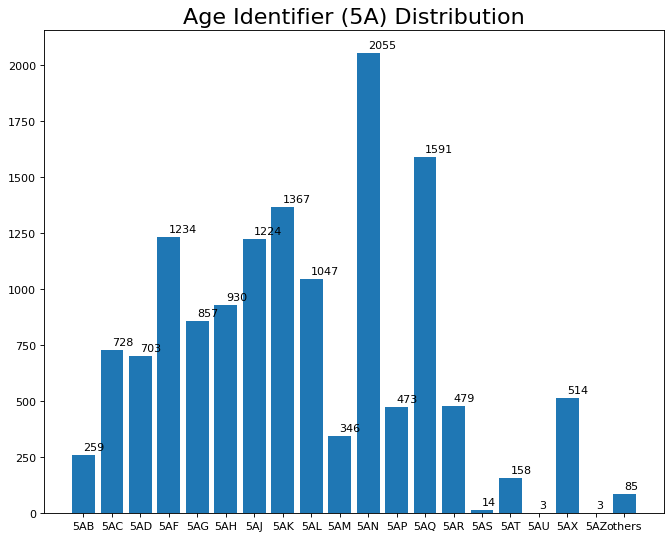

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

age_copy = age_distr.copy()

age_distr_without_None = {}
for i in sorted(age_copy):
  age_distr_without_None[i] = age_copy[i]
print(age_distr_without_None)

del age_distr_without_None['None'] #65482
keys = age_distr_without_None.keys()
values = age_distr_without_None.values()

figure(figsize=(10, 8), dpi=80)
# displaying the title
plt.title("Age Identifier (5A) Distribution", fontsize = 20)
plt.bar(keys, values)

for index in age_distr_without_None:
  plt.text(index, age_distr_without_None[index] + 20, str(age_distr_without_None[index]))

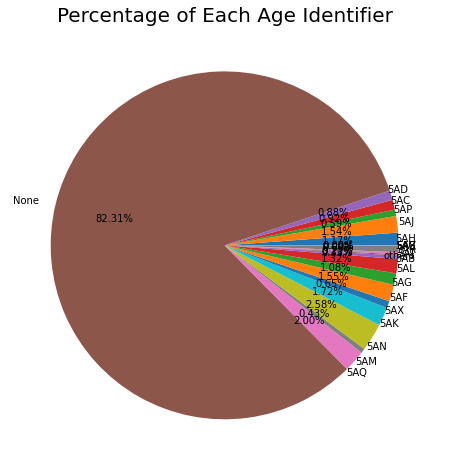

In [ ]:
import matplotlib

import matplotlib.pyplot as plt

category = [key for key in age_distr]
expend = [age_distr[key] for key in age_distr]
 
plt.figure(figsize=(12,8))

pictures,category_text,percent_text = plt.pie(
        expend,                      
        labels = category,                
        autopct = "%0.2f%%",              
        pctdistance = 0.65,
        radius = 1,                  
        center = (-10,0),                 
        shadow=False)
 
#plt.legend(loc = "center right")
plt.title("Percentage of Each Age Identifier", fontsize = 20)
plt.show()

## **If main topic contain Y**

In [ ]:
item_data['contain_Y'] = 'None'
item_data['contain_Y'] = [[Y_identifier(topic)] for topic in item_data['main topic']]

In [ ]:
item_data.head(10)

,Unnamed: 0,itemID,title,author,publisher,main topic,subtopics,language,age_identifier,contain_Y
0,0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],en,[1],[1]
1,1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ, AGZ, WFA, YBG, YBL, YNA, YPA]",de,[1],[N]
2,2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP, FBA]",en,[2],[1]
3,3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC, 5AD, YBG, YBL, YF]",de,"[0, 0]",[0]
4,4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD, WFTM, YBG, YBL, YBLD, YBLN1]",de,"[0, 0, 0, 0]",[N]
5,5,34217,Ewig geliebt,J. R. Ward,Heyne Taschenbuch,FMR,"[1KBB-US-NAK, FMX, FRX, 3MRBF]",af,[N],[N]
6,6,31436,Meine Sticker-Tiere,NaN,Ars Edition GmbH,YBG,"[5AD, YBG, YBLL]",de,[0],[0]
7,7,14576,Unsterblich 01 - Tor der Dämmerung,Julie Kagawa,Heyne Taschenbuch,YFE,"[5AQ, FM, YFE, YFH]",de,[2],[1]
8,8,17731,Unsterblich 02 - Tor der Nacht,Julie Kagawa,Heyne Taschenbuch,YFH,"[5AQ, FM, YFE, YFH]",de,[2],[1]
9,9,58723,Pedro und die Bettler von Cartagena,Ursula Hasler,dtv Verlagsgesellschaft,YFB,"[5AM, 1KLSC]",de,[1],[1]


In [ ]:
item_data['age'] = item_data['age_identifier'] + item_data['contain_Y']

In [ ]:
def remove_None(data):
  value = 'N'
  while value in data:
      data.remove(value)
  if (len(data) == 0): return (str('None'))
  return (data)

In [ ]:
item_data['age'] = item_data['age'].apply(remove_None)
print(item_data['age'].head())

0          [1, 1]
1             [1]
2          [2, 1]
3       [0, 0, 0]
4    [0, 0, 0, 0]
Name: age, dtype: object


In [ ]:
def calculate_mean(age_list):
  if age_list != 'None':
    return(mean(age_list))
  else:
    return age_list

In [ ]:
from statistics import mean

item_data['age'] = item_data['age'].apply(calculate_mean)
print(item_data['age'].head())

0      1
1      1
2    1.5
3      0
4      0
Name: age, dtype: object


In [ ]:
item_data.loc[item_data['age'] == 'None'].count() #26441

Unnamed: 0        26441
itemID            26441
title             26441
author            26059
publisher         26432
main topic        26265
subtopics         26441
language          26441
age_identifier    26441
contain_Y         26441
age               26441
dtype: int64

# **Save a new csv file**

In [ ]:
#save as a new csv file
result_data = item_data.copy()
result_data.drop(['age_identifier','contain_Y', 'language'], axis=1, inplace=True)
result_data = result_data.rename(columns={"age": "interest_age"})
print(result_data.head())
#result_data.to_csv('item_age_identifier.csv', index = False)

{1: 39035, 1.5: 1438, 0: 5989, 'None': 26441, 0.6: 14, 2: 730, 2.5: 86, 0.5: 1924, 0.25: 19, 0.3333333333333333: 145, 0.6666666666666666: 504, 10.5: 283, 0.75: 31, 7.333333333333333: 56, 1.3333333333333333: 272, 1.6666666666666667: 57, 10: 270, 2.3333333333333335: 3, 1.25: 21, 0.8: 14, 20: 97, 13.333333333333334: 120, 5: 4, 3: 171, 5.75: 15, 6.666666666666667: 41, 0.2: 6, 15: 1, 4.8: 6, 0.4: 6, 0.9090909090909091: 1, 3.375: 1, 0.8333333333333334: 8, 11: 16, 5.25: 1, 0.7142857142857143: 1, 1.6: 3, 2.857142857142857: 1, 1.4: 1, 1.75: 7, 14.285714285714286: 1, 7.666666666666667: 10, 4.166666666666667: 3, 7: 142, 0.14285714285714285: 2, 0.16666666666666666: 2, 5.6: 1, 1.4285714285714286: 1, 4.2: 1, 6: 1, 12.222222222222221: 1, 0.8571428571428571: 4, 13.666666666666666: 4, 2.2: 1, 0.125: 1, 3.3333333333333335: 1, 8.333333333333334: 1, 5.545454545454546: 1, 5.5: 3, 12.6: 1, 0.5714285714285714: 1, 11.5: 1, 8.4: 1, 0.8888888888888888: 1, 11.714285714285714: 1, 2.090909090909091: 1, 0.625: 1, 1

<BarContainer object of 68 artists>

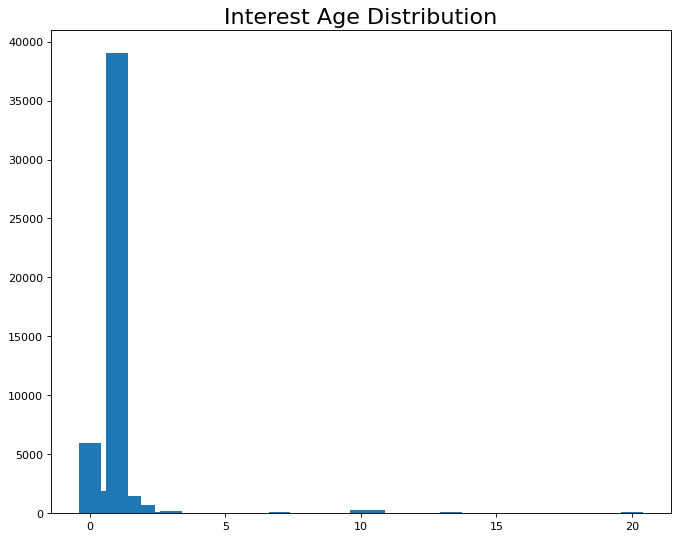

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plot_interest_age = result_data.copy()
age_c = {}

def age_cc(interest_age):
  if interest_age in age_c:
    age_c[interest_age] += 1
  else:
    age_c[interest_age] = 1
  
  return(0)

ok = [age_cc(in_age) for in_age in plot_interest_age['interest_age']]
print(age_c)


#plot_interest_age['interest_age'].value_counts().plot()
#plot_interest_age.iloc[:3]['interest_age'].plot(kind="bar")


age_value = {}
del age_c['None']
for i in sorted(age_c):
  age_value[i] = age_c[i]
print(age_value)

keys = age_value.keys()
values = age_value.values()

figure(figsize=(10, 8), dpi=80)
# displaying the title
plt.title("Interest Age Distribution", fontsize = 20)
plt.bar(keys, values)

#for index in age_value:
  #plt.text(index, age_value[index] + 40, str(age_value[index]))

{'boxes': [<matplotlib.lines.Line2D at 0x7f6126731c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6126738c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f61266c1cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f61266c1790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6126738210>,
  <matplotlib.lines.Line2D at 0x7f6126738750>]}

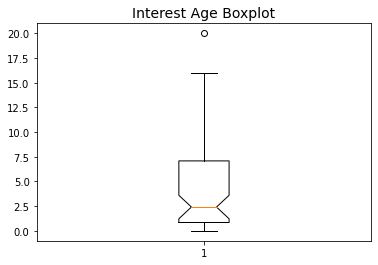

In [ ]:
plt.title("Interest Age Boxplot", fontsize = 14)
plt.boxplot(keys, values)